In [1]:
%matplotlib inline
import pandas as pd
import sklearn
import numpy as np
from IPython.display import display
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
import pickle
import codecs
import collections
import keras.preprocessing
from sklearn.model_selection import KFold
import csv

Using TensorFlow backend.


In [3]:
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Reshape, Activation, Input, Dense,GRU,Reshape,TimeDistributed,Bidirectional,Dropout,Masking
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.layers import Embedding,TimeDistributed,Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.models import Sequential, Model
from keras.layers import GRU, Dropout
from keras.models import load_model
from keras.layers import Embedding, Reshape, Activation, Input, Dense, Masking
from keras.layers.merge import Dot
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.utils.np_utils import to_categorical
from keras.preprocessing.sequence import skipgrams
from keras.preprocessing import sequence
from keras import backend as K
from keras.optimizers import Adam
from keras.layers.convolutional import Conv1D
from keras.layers import Embedding,TimeDistributed,Flatten
from keras.layers import BatchNormalization,Dropout


In [4]:
import seaborn as sns
sns.set(style="darkgrid")

In [5]:
plt.rcParams['font.family']='TH SarabunPSK' #you can change to other font that works for you
plt.rcParams.update({'font.size': 50})
#fill your code here

In [6]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [7]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [8]:
input_nation = pd.read_csv('notebook8-LDAFeature-thisnation.csv')

In [9]:
input_nation.drop('Unnamed: 0', axis=1, inplace=True)
# input_nation.drop('content', axis=1,inplace=True)
input_nation.drop('share', axis=1, inplace=True)
input_nation.drop('like', axis=1, inplace=True)
input_nation.drop('comment', axis=1, inplace=True)
input_nation.drop('time', axis=1, inplace=True)
input_nation.drop('tag', axis=1, inplace=True)

# input_nation.drop('Unnamed: 0.1', axis=1, inplace=True)


In [10]:
input_nation.head()

,headline,date,DOW,view,category,hour,token,numToken,numChar,timeDelta,month,year,num_noun,num_pronoun,num_verb,num_preverb,num_determiner,num_adverb,num_classifier,num_conjunction,num_preposition,num_interjunction,num_prefix,num_ending,num_negator,num_punctuation,nnoun_per_ntoken,nverb_per_ntoken,nadverb_per_ntoken,is_ภูมิภาค,is_สุขภาพ / คุณภาพชีวิต,is_อาชญากรรม,is_ประชาสัมพันธ์,is_เจาะประเด็นร้อน,is_ไลฟ์สไตล์,is_ข่าวในพระราชสำนัก,is_การเมืองทั่วไป,is_เศรษฐกิจ,is_ต่างประเทศ,is_ดูดวง,is_แฟชั่น / ความงาม,is_บันเทิง / ดูหนัง / ฟังเพลง,is_เกษตร / ทำกิน / สัตว์เลี้ยง,is_ท่องเที่ยว / อาหาร,is_คลิปเด็ด,is_บันเทิง,is_การเมือง,is_กีฬา,is_คุณภาพชีวิต,tag_pop_sum,tag_pop_mean,num_date,num_email,num_law,num_len,num_location,num_money,num_organization,num_percent,num_person,num_phone,num_time,num_url,num_person_2,num_pos,num_neg,tag_top_pop_sum,tag_top_pop_mean,num_tag_pop,tag_top_worst_sum,tag_top_worst_mean,num_tag_worst,numTag,sim_top,sim_worst,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7
0,ไทยส่งทีมเยาวชนลุยศึกเชียร์ลีดดิ้งโลกที่สหรัฐฯ,2019-04-05,FRI,494,กีฬา,12,"ไทย,ทีม,เยาวชนลุยศึก,เชียร์,ลีด,ดิ้ง,โลก,สหรัฐฯ",8,40,15,4,2019,8,0,0,0,0,0,0,0,0,0,0,0,0,0,1.000000,0.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5831,5831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1000,1000,1,1000,1000,1,1,0.592839,0.732081,0.013897,0.013903,0.013897,0.013902,0.013903,0.902694,0.013901,0.013904
1,"""บิ๊กโจ๊ก"" จ่อเรียก ""ปิยบุตร"" ให้ข้อมูล ปมถูกร้อง",2019-04-05,FRI,1250,อาชญากรรม,12,"บิ๊กโจ๊ก,จ่อ,ปิยบุตร,ข้อมูล,ปม,ร้อง",6,30,15,4,2019,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5831,5831,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1000,1000,1,1000,1000,1,1,0.696755,0.655626,0.017884,0.874924,0.017867,0.017859,0.017866,0.017873,0.017865,0.017862
2,"""ศศิน"" ชี้ ""เปรมชัย"" ต้องติดคุก จึงจะเหมาะสม",2019-04-05,FRI,755,คุณภาพชีวิต,12,"ศศิน,ชี้,เปรมชัย,ติด,คุก,เหมาะสม",6,27,15,4,2019,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0.500000,0.500000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5831,5831,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1000,1000,1,1000,1000,1,1,0.714953,0.707846,0.649099,0.243673,0.017870,0.017867,0.017883,0.017868,0.017877,0.017864
3,จิตอาสาปรับปรุงภูมิทัศน์รอบ แหล่งน้ำศักดิ์สิทธิ์,2019-04-05,FRI,232,ภูมิภาค,12,"จิตอาสา,ปรับปรุง,ภูมิทัศน์,รอบ,แหล่ง,น้ำ,ศักดิ์สิทธิ์",7,47,15,4,2019,5,0,1,0,0,0,0,0,1,0,0,0,0,0,0.714286,0.142857,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5831,5831,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1000,1000,1,1000,1000,1,1,0.475320,0.519995,0.015631,0.015632,0.337067,0.015635,0.015629,0.015632,0.015636,0.569140
4,คุณภาพน้ำ สงกรานต์คูเมืองเชียงใหม่ เกณฑ์พอใช้,2019-04-05,FRI,298,คุณภาพชีวิต,12,"คุณภาพ,น้ำ,สงกรานต์,คูเมืองเชียงใหม่,เกณฑ์,พอใช้",6,43,15,4,2019,5,0,1,0,0,0,0,0,0,0,0,0,0,0,0.833333,0.166667,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5831,5831,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1000,1000,1,1000,1000,1,1,0.517778,0.545254,0.017864,0.017880,0.017871,0.160718,0.017869,0.017866,0.017894,0.732038


In [11]:
input_nation['view'].describe()

count    5831.000000  
mean     2490.978048  
std      7603.455830  
min      0.000000     
25%      298.000000   
50%      647.000000   
75%      1585.500000  
max      198827.000000
Name: view, dtype: float64

In [12]:
MAXVIEW = input_nation['view'].max()
MAXVIEW

198827

In [13]:
view_mean = input_nation['view'].describe()['mean']
view_sd = input_nation['view'].describe()['std']

In [14]:
input_nation['view'].describe()

count    5831.000000  
mean     2490.978048  
std      7603.455830  
min      0.000000     
25%      298.000000   
50%      647.000000   
75%      1585.500000  
max      198827.000000
Name: view, dtype: float64

In [15]:
len(input_nation)

5831

## Feature extraction

In [27]:
# input_nation_train, input_nation_test = train_test_split(input_nation, test_size=0.2,random_state=100)

In [28]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(input_nation_train['view'],ax=axarr[0])
# sns.distplot(input_nation_test['view'],ax=axarr[1])

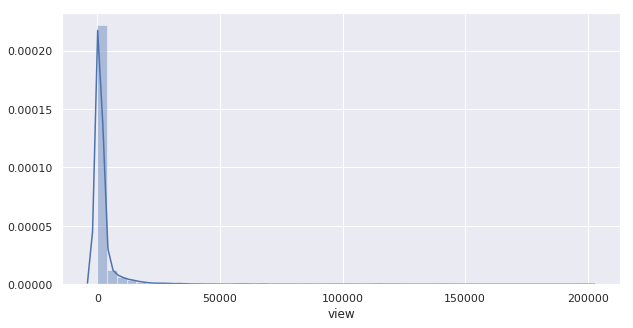

In [17]:
f, axarr = plt.subplots( figsize=(10,5))
sns.distplot(input_nation['view'])

In [52]:
view_df = pd.DataFrame(input_nation['view'])

In [53]:
view_df.shape

(5831, 1)

In [54]:
from sklearn.cluster import KMeans

In [55]:
k=2

In [56]:
kmeans = KMeans(n_clusters=k, random_state=0).fit(view_df)
kmeans.cluster_centers_

array([[49256.71590909],
       [ 1774.38655755]])

In [57]:
input_nation['class'] = 0

In [58]:
for i in range(8):
    split_class = np.argmax(input_nation['class'].value_counts())
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pd.DataFrame(input_nation[input_nation['class']==split_class]['view']))
#     print(kmeans.cluster_centers_)
#     print(input_nation_train['class'].value_counts())
    if len(np.argwhere(kmeans.labels_ == 0)) < len(np.argwhere(kmeans.labels_ == 1)):
        tmp = np.argwhere(kmeans.labels_ == 0)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 1)] = split_class
        kmeans.labels_[tmp] = 8-i
    else:
        tmp = np.argwhere(kmeans.labels_ == 1)
        kmeans.labels_[np.argwhere(kmeans.labels_ == 0)] = split_class
        kmeans.labels_[tmp] = 8-i
    input_nation.loc[(input_nation['class'] == split_class), 'class'] = kmeans.labels_
#     print(input_nation_train['class'].value_counts())


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current 

In [59]:
print(input_nation['class'].value_counts())

4    907
0    890
3    878
5    816
2    717
6    700
1    451
7    384
8    88 
Name: class, dtype: int64


In [60]:
input_nation.groupby('class')['view'].describe()['max']

class
0    371.0   
1    2112.0  
2    822.0   
3    171.0   
4    583.0   
5    1374.0  
6    6754.0  
7    25303.0 
8    198827.0
Name: max, dtype: float64

In [61]:
input_nation = input_nation[(input_nation['class']!=7)&(input_nation['class']!=8)]

In [62]:
# input_nation = input_nation[(input_nation['class']!=5)]

In [63]:
# input_nation_train.loc[(input_nation_train['class'] == 5), 'class'] = 4
# input_nation_train.loc[(input_nation_train['class'] == 6), 'class'] = 4
# input_nation_train.loc[(input_nation_train['class'] == 7), 'class'] = 4

In [64]:
print(input_nation['class'].value_counts())

4    907
0    890
3    878
5    816
2    717
6    700
1    451
Name: class, dtype: int64


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['TH SarabunPSK'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


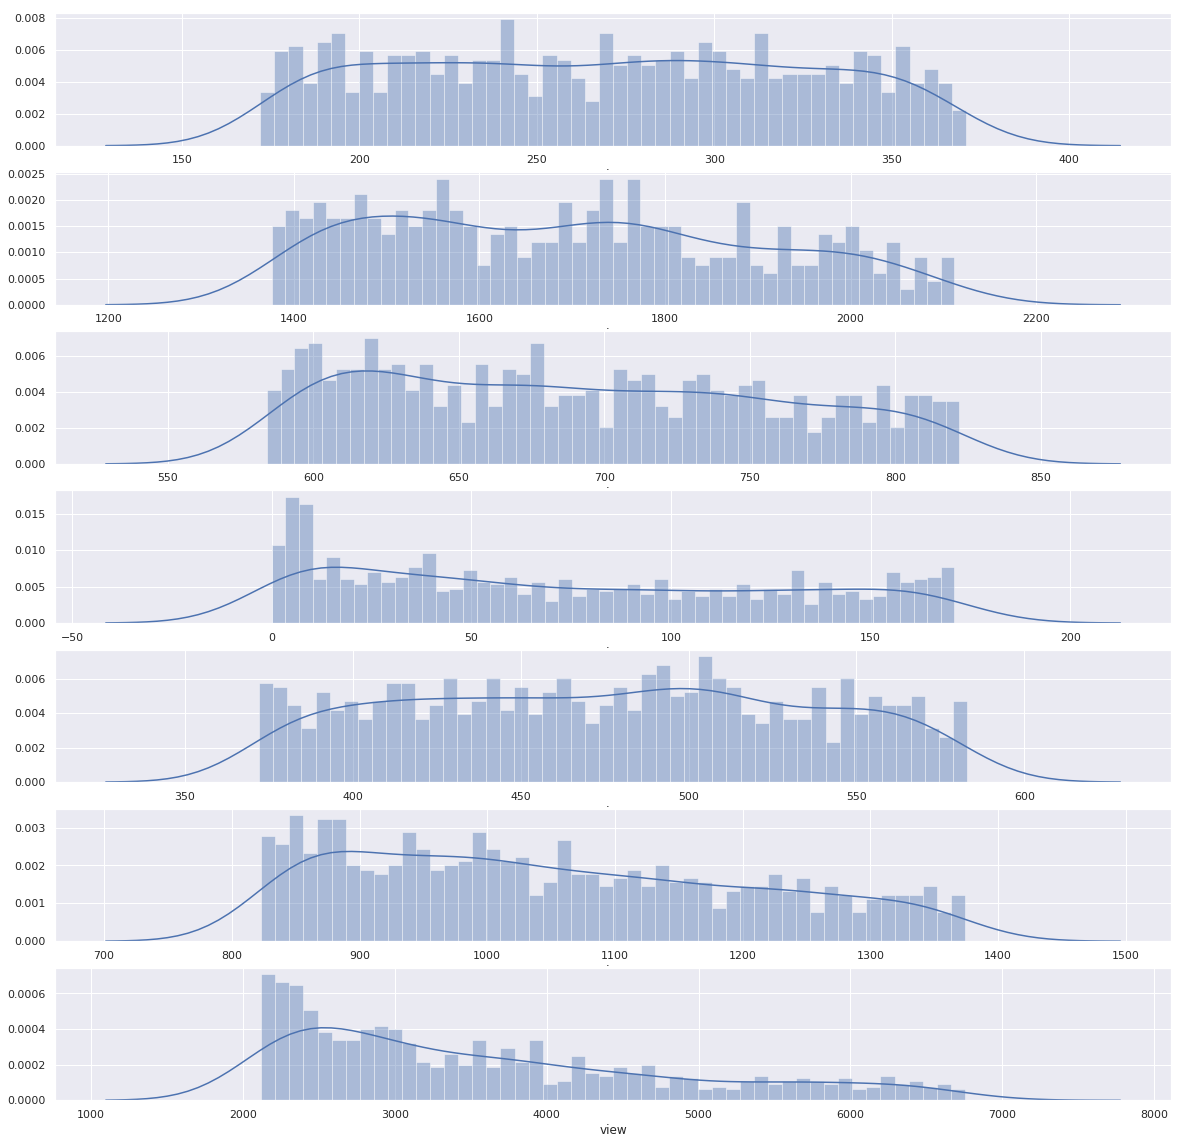

In [65]:
f, axarr = plt.subplots(7, figsize=(20,20))
for i in range(7):
#     print(i,len(input_nation_train[input_nation_train['class']==i]))
    if len(input_nation[input_nation['class']==i]) > 1:
        sns.distplot(input_nation[input_nation['class']==i]['view'],ax=axarr[i],bins=50)


In [66]:
input_nation_train, input_nation_test = train_test_split(input_nation, test_size=0.2,random_state=100)

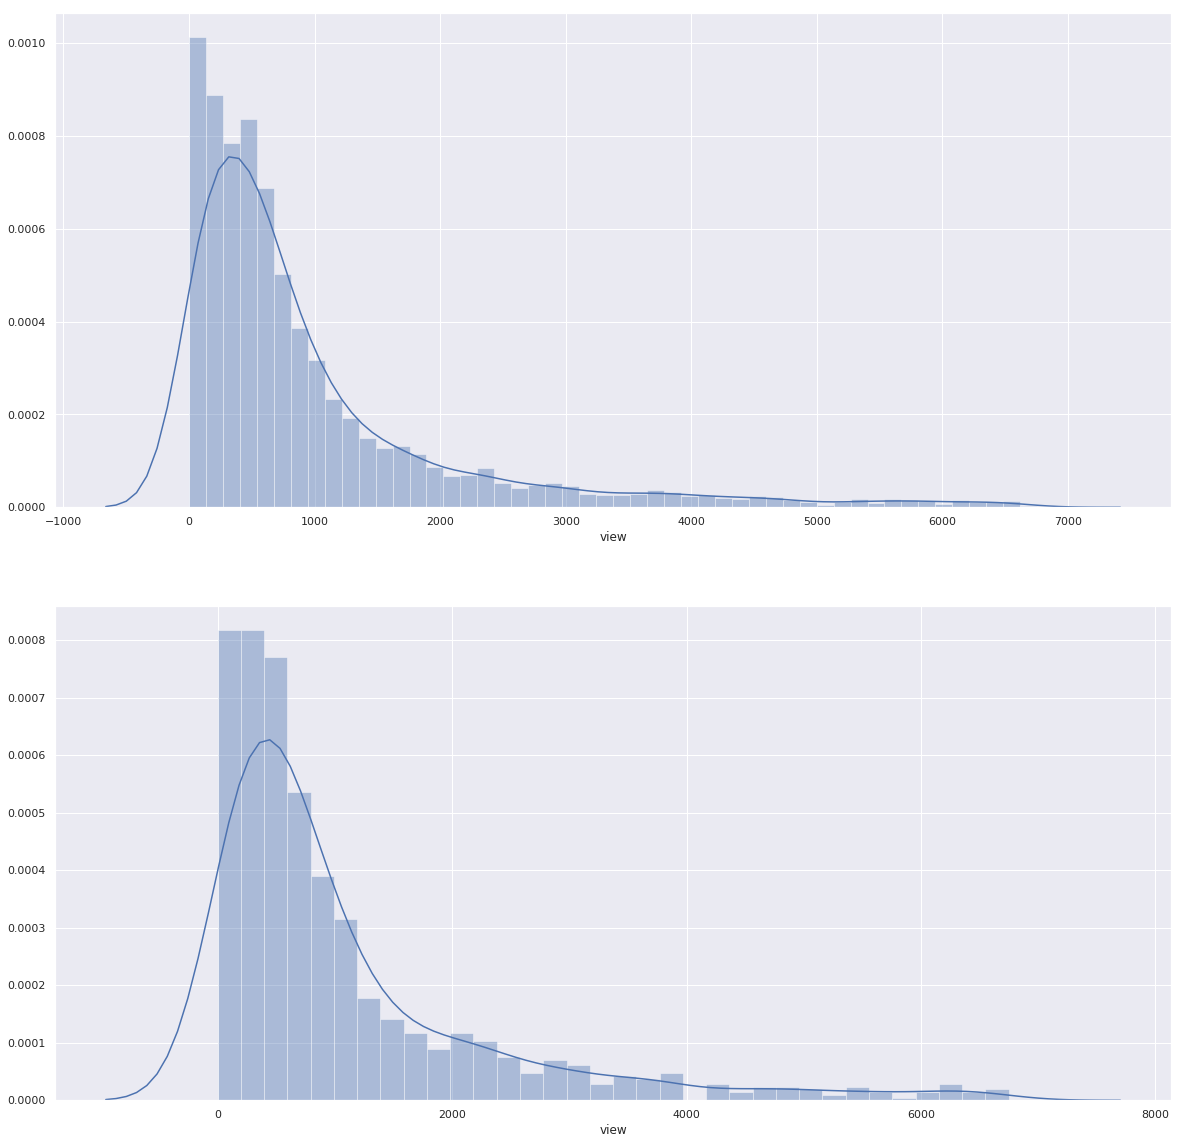

In [67]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(input_nation_train['view'],ax=axarr[0])
sns.distplot(input_nation_test['view'],ax=axarr[1])

## Bag of word feature

In [71]:
inputText_train = []
for sent in input_nation_train['token']:
    inputText_train.append(sent.split(','))

In [72]:
inputText_test = []
for sent in input_nation_test['token']:
    inputText_test.append(sent.split(','))

In [73]:
np.log(input_nation_train['view']).describe()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    4287.000000
mean    -inf        
std     NaN         
min     -inf        
25%      5.572154   
50%      6.354370   
75%      7.052288   
max      8.817890   
Name: view, dtype: float64

In [74]:
# MINVIEW

In [75]:
# f, axarr = plt.subplots(2, figsize=(20,20))
# sns.distplot(inputLabel_train,ax=axarr[0])
# sns.distplot(inputLabel_test,ax=axarr[1])

In [76]:
# print(len(inputText_train),len(inputLabel_train))

In [77]:
# print(len(inputText_test),len(inputLabel_test))

In [78]:
words = []
for sentence in inputText_train:
    for word in sentence:
        words.append(word)
        
word_count = list()
word_count.extend(collections.Counter(words).most_common(len(set(words))))
word_count = word_count[:len(word_count)//10]
word_count.append(("UNK",0))

train_word = set()
for i in word_count:
    train_word.add(i[0])

In [79]:
len(word_count)

681

In [80]:
all_token = set()
for word in train_word:
    all_token.add(word)

In [81]:
all_token = list(all_token)
all_token.insert(0,'for padding')
all_token.insert(1,'UNK')

In [82]:
len(all_token)

683

In [83]:
token_map = dict(zip(all_token, range(len(all_token))))
token_map_reverse = dict(zip(range(len(all_token)),all_token))

In [84]:
input_data_train = np.asarray(input_nation_train['token'].str.split(','))
input_data_test = np.asarray(input_nation_test['token'].str.split(','))

In [85]:
def count_word(sent):
    global all_token, token_map
    result = np.zeros(len(all_token))
    np_token = np.array(sent)
    str_token, str_token_count = np.unique(np_token, return_counts=True)
    for char, count in zip(str_token, str_token_count):
        if char not in token_map.keys():
            char = 'UNK'
        result[token_map[char]] = count
    return result

In [86]:
temp_train = np.vectorize(count_word, otypes=[object])(input_data_train)
x_f1_train = np.array([[e for e in sl] for sl in temp_train.tolist()])
temp_test = np.vectorize(count_word, otypes=[object])(input_data_test)
x_f1_test = np.array([[e for e in sl] for sl in temp_test.tolist()])

In [87]:
x_f1_train.shape

(4287, 683)

## Numerical feature

In [90]:
input_nation.columns[50:]

Index(['tag_pop_mean', 'num_date', 'num_email', 'num_law', 'num_len',
       'num_location', 'num_money', 'num_organization', 'num_percent',
       'num_person', 'num_phone', 'num_time', 'num_url', 'num_person_2',
       'num_pos', 'num_neg', 'tag_top_pop_sum', 'tag_top_pop_mean',
       'num_tag_pop', 'tag_top_worst_sum', 'tag_top_worst_mean',
       'num_tag_worst', 'numTag', 'sim_top', 'sim_worst', 'Topic 0', 'Topic 1',
       'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7',
       'class'],
      dtype='object')

In [91]:
numerical_feature = [
        'numToken', 'numChar','timeDelta', 'num_noun', 'num_pronoun', 'num_verb',
       'num_preverb', 'num_determiner', 'num_adverb', 'num_classifier',
       'num_conjunction', 'num_preposition', 'num_interjunction', 'num_prefix',
       'num_ending', 'num_negator', 'num_punctuation',
       'nnoun_per_ntoken', 'nverb_per_ntoken', 'nadverb_per_ntoken',
       'num_date', 'num_email', 'num_law', 'num_len', 'num_location',
       'num_money', 'num_organization', 'num_percent', 'num_person',
       'num_phone', 'num_time', 'num_url', 'num_person_2', 'num_pos',
       'num_neg', 'sim_top', 'sim_worst', 'Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4',
       'Topic 5', 'Topic 6', 'Topic 7']



In [92]:
len(numerical_feature)

45

In [93]:
cs = MinMaxScaler()

In [94]:
trainContinuous = cs.fit_transform(input_nation_train[numerical_feature])
testContinuous = cs.fit_transform(input_nation_test[numerical_feature])

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [95]:
trainContinuous.shape

(4287, 45)

## Categorial feature

In [96]:
categorial_feature = ['DOW',
        'month', 'year','hour',
       'is_ภูมิภาค', 'is_สุขภาพ / คุณภาพชีวิต',
       'is_อาชญากรรม', 'is_ประชาสัมพันธ์', 'is_เจาะประเด็นร้อน',
       'is_ไลฟ์สไตล์', 'is_ข่าวในพระราชสำนัก', 'is_การเมืองทั่วไป',
       'is_เศรษฐกิจ', 'is_ต่างประเทศ', 'is_ดูดวง', 'is_แฟชั่น / ความงาม',
       'is_บันเทิง / ดูหนัง / ฟังเพลง', 'is_เกษตร / ทำกิน / สัตว์เลี้ยง',
       'is_ท่องเที่ยว / อาหาร', 'is_คลิปเด็ด', 'is_บันเทิง', 'is_การเมือง',
       'is_กีฬา', 'is_คุณภาพชีวิต'
       ]

# categorial_feature = ['DOW', 'hour',
#         'month', 'year',
#         'is_environment',
#        'is_crime', 'is_social',
#          'is_science', 
#         'is_Mon', 'is_Tue', 'is_Wed',
#        'is_Thu', 'is_Fri',   'is_weekend', 'is_pos',
#        'is_neg']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','is_inter',
#                      'is_region','is_Wed','is_asian','is_south']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat']

# categorial_feature = ['year','is_social','is_health','is_disaster','is_weekend','is_Sat','hour','month']

In [97]:
len(categorial_feature)

24

In [98]:
lb = preprocessing.LabelBinarizer()

In [99]:
# zipBinarizer = lb.fit(input_nation["DOW"])
# trainCategorical_dow = zipBinarizer.transform(input_nation_train["DOW"])
# testCategorical_dow = zipBinarizer.transform(input_nation_test["DOW"])
# zipBinarizer = lb.fit(input_nation["month"])
# trainCategorical_month = zipBinarizer.transform(input_nation_train["month"])
# testCategorical_month = zipBinarizer.transform(input_nation_test["month"])
# zipBinarizer = lb.fit(input_nation["year"])
# trainCategorical_year = zipBinarizer.transform(input_nation_train["year"])
# testCategorical_year = zipBinarizer.transform(input_nation_test["year"])
# zipBinarizer = lb.fit(input_nation["hour"])
# trainCategorical_hour = zipBinarizer.transform(input_nation_train["hour"])
# testCategorical_hour = zipBinarizer.transform(input_nation_test["hour"])
# zipBinarizer = lb.fit(input_nation["category"])
# trainCategorical_category = zipBinarizer.transform(input_nation_train["category"])
# testCategorical_category = zipBinarizer.transform(input_nation_test["category"])
# zipBinarizer = lb.fit(input_nation["sentiment"])
# trainCategorical_sentiment = zipBinarizer.transform(input_nation_train["sentiment"])
# testCategorical_sentiment = zipBinarizer.transform(input_nation_test["sentiment"])

In [142]:
# input_nation[input_nation['hour'].isnull()]

,DOW,category,date,headline,hour,is_การเมือง,is_กีฬา,is_ต่างประเทศ,is_บันเทิง,is_สังคมออนไลน์,is_อาชญากรรม,is_เศรษฐกิจ,is_โครงข่ายตาสับปะรด,is_ในประเทศ,is_ในพระราชสำนัก,is_ไลฟ์สไตล์,month,nadverb_per_ntoken,nnoun_per_ntoken,numChar,numTag,numToken,num_adverb,num_classifier,num_conjunction,num_date,num_determiner,num_email,num_ending,num_interjunction,num_law,num_len,num_location,num_money,num_neg,num_negator,num_noun,num_organization,num_percent,num_person,num_person_2,num_phone,num_pos,num_prefix,num_preposition,num_preverb,num_pronoun,num_punctuation,num_tag_pop,num_tag_worst,num_time,num_url,num_verb,nverb_per_ntoken,sim_top,sim_worst,tag,tag_pop_mean,tag_pop_sum,tag_top_pop_mean,tag_top_pop_sum,tag_top_worst_mean,tag_top_worst_sum,time,timeDelta,token,view,year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,class


## Concat feature

In [100]:
tmp_train = np.hstack([x_f1_train, trainContinuous])
tmp_test = np.hstack([ x_f1_test, testContinuous])
print(tmp_train.shape)

for f in categorial_feature:
#     print(f)
    zipBinarizer = lb.fit(input_nation[f])
    trainCategorical = zipBinarizer.transform(input_nation_train[f])
    testCategorical = zipBinarizer.transform(input_nation_test[f])
    tmp_train = np.hstack([tmp_train,trainCategorical])
    tmp_test = np.hstack([tmp_test,testCategorical])

(4287, 728)


In [101]:
x_train = tmp_train
x_test = tmp_test

In [102]:
x_train.shape

(4287, 783)

In [103]:
# x_train = np.hstack([x_f1_train, trainContinuous,trainCategorical_dow,trainCategorical_month,trainCategorical_year,
#                      trainCategorical_hour,trainCategorical_category,trainCategorical_sentiment])
# x_test = np.hstack([x_f1_test, testContinuous,testCategorical_dow,testCategorical_month,testCategorical_year,
#                     testCategorical_hour,testCategorical_category,testCategorical_sentiment])

In [104]:
# x_train = np.hstack([x_f1_train,trainCategorical_dow,trainCategorical_hour,trainCategorical_category])
# x_test = np.hstack([x_f1_test,testCategorical_dow,testCategorical_hour,testCategorical_category])

In [105]:
# x_train = np.hstack([x_f1_train, trainContinuous])
# x_test = np.hstack([x_f1_test, testContinuous])

## create y

In [106]:
view_bound = list(input_nation_train.groupby('class')['view'].describe()['max'])

In [107]:
view_bound

[370.0, 2105.0, 822.0, 171.0, 583.0, 1374.0, 6754.0]

In [108]:
view_bound = sorted(view_bound)

In [109]:
view_bound

[171.0, 370.0, 583.0, 822.0, 1374.0, 2105.0, 6754.0]

In [110]:
inputLabel_train_class = []
for view in input_nation_train['view']:
    if view <= view_bound[0] :
        inputLabel_train_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_train_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_train_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_train_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_train_class.append(4)
    elif view <= view_bound[5] : 
        inputLabel_train_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_train_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_train_class.append(7)
    else:
        inputLabel_train_class.append(6)

In [111]:
inputLabel_test_class = []
for view in input_nation_test['view']:
    if view <= view_bound[0] :
        inputLabel_test_class.append(0)
    elif view <= view_bound[1] : 
        inputLabel_test_class.append(1)
    elif view <= view_bound[2] : 
        inputLabel_test_class.append(2)
    elif view <= view_bound[3] : 
        inputLabel_test_class.append(3)
    elif view <= view_bound[4] : 
        inputLabel_test_class.append(4)
    elif view <= view_bound[5] : 
        inputLabel_test_class.append(5)
#     elif view <= view_bound[6] : 
#         inputLabel_test_class.append(6)
#     elif view <= view_bound[7] : 
#         inputLabel_test_class.append(7)
    else:
        inputLabel_test_class.append(6)

In [112]:
y_train_class = inputLabel_train_class
y_train_class = np.asarray(y_train_class).reshape(-1,1)
y_test_class = inputLabel_test_class
y_test_class = np.asarray(y_test_class).reshape(-1,1)

In [113]:
y_train_class, y_val_class = train_test_split(y_train_class, test_size=0.2,random_state=100)

In [114]:
MAXVIEW_log = np.log(input_nation['view']).describe()['max']

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [115]:
inputLabel_train_view = []
for view in input_nation_train['view']:
    inputLabel_train_view.append(np.log(view+0.00001)/MAXVIEW_log)

In [116]:
inputLabel_test_view = []
for view in input_nation_test['view']:
    inputLabel_test_view.append(np.log(view+0.00001)/MAXVIEW_log)

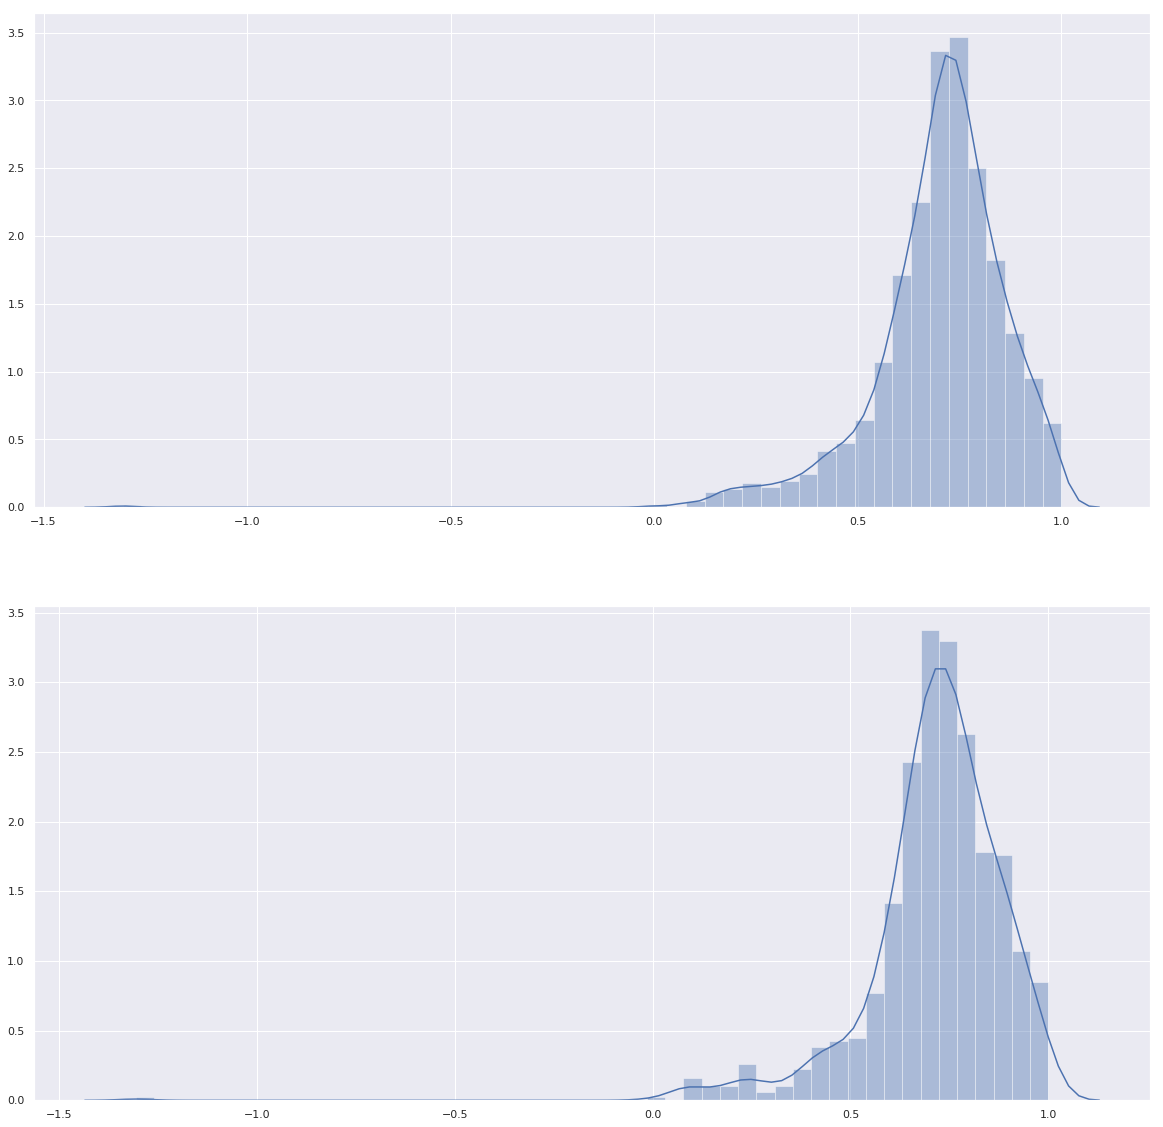

In [117]:
f, axarr = plt.subplots(2, figsize=(20,20))
sns.distplot(inputLabel_train_view,ax=axarr[0])
sns.distplot(inputLabel_test_view,ax=axarr[1])

In [118]:
y_train_view = inputLabel_train_view
y_train_view = np.asarray(y_train_view).reshape(-1,1)
y_test_view = inputLabel_test_view
y_test_view= np.asarray(y_test_view).reshape(-1,1)

In [119]:
y_train_view, y_val_view = train_test_split(y_train_view, test_size=0.2,random_state=100)

In [120]:
y_test_view.shape

(1072, 1)

## Prepare data for Keras

In [121]:
x_train, x_val = train_test_split(x_train, test_size=0.2,random_state=100)

In [122]:
x_train=keras.preprocessing.sequence.pad_sequences(x_train, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_val=keras.preprocessing.sequence.pad_sequences(x_val, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
x_test=keras.preprocessing.sequence.pad_sequences(x_test, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)


In [123]:
x_train.shape

(3429, 783)

In [124]:
print("train size",x_train.shape)
print("val size",x_val.shape)
print("test size",x_test.shape)

train size (3429, 783)
val size (858, 783)
test size (1072, 783)


In [125]:
# y_train = inputLabel_train
# y_train = np.asarray(y_train).reshape(-1,1)
# y_test = inputLabel_test
# y_test = np.asarray(y_test).reshape(-1,1)

In [126]:
y_train_class = np_utils.to_categorical(y_train_class)
y_val_class = np_utils.to_categorical(y_val_class)
y_test_class = np_utils.to_categorical(y_test_class)

In [127]:
# y_train, y_test =  train_test_split(y_train, test_size=0.2,random_state=1)

In [128]:
print("train size",y_train_class.shape)
print("train size",y_val_class.shape)
print("test size",y_test_class.shape)
print("train size",y_train_view.shape)
print("train size",y_val_view.shape)
print("test size",y_test_view.shape)

train size (3429, 7)
train size (858, 7)
test size (1072, 7)
train size (3429, 1)
train size (858, 1)
test size (1072, 1)


## Create Model

In [129]:
# from sklearn.model_selection import KFold

In [130]:
# kfold = KFold(10, True, 1)

In [131]:
# def create_model():
# #     x_train2 = x_train.reshape(x.shape[0], 1, x.shape[1])
#     input1 = Input(shape=(x_train.shape[1],))
# #     x = LSTM(32)(input1)
# #     x = Dense(256, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(128, activation='relu')(input1)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(64, activation='relu')(x)
# #     x = Dropout(0.3)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(32, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
# #     x = Dense(16, activation='relu')(x)
# #     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

# #     x = Dense(2048, activation='relu')(input1)
# #     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.3)(x)
    
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(64, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
#     x = Dense(16, activation='relu')(x)
#     x = Dropout(0.2)(x)
# #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1,activation='linear')(x)
#     model = Model(inputs=input1, outputs=x)
#     adam  = Adam(lr=0.0001)
#     model.compile(optimizer=adam,  loss='mean_absolute_percentage_error')
    
#     return model


In [187]:
def create_model():
    input1 = Input(shape=(x_train.shape[1],))
#     x = Dense(2048, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

#     x = Dense(1024, activation='relu')(input1)
#     x = Dropout(0.5)(x)
#     x = Dense(512, activation='relu')(x)
#     x = Dropout(0.5)(x)
# # #     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(256, activation='relu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(16, activation='relu')(x)
    x = Dropout(0.2)(x)
#     x = BatchNormalization(momentum=0.99, epsilon=0.001)(x)

    class_out = Dense(7,activation='softmax')(x)
    
    model = Model(inputs=input1, outputs=class_out)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=Adam(),
            loss='categorical_crossentropy',
            metrics=['acc'])
    
    return model


In [212]:
def create_model_2():
    input1 = Input(shape=(x_train.shape[1]+7,))
    x = Dense(256, activation='elu')(input1)
    x = Dropout(0.3)(x)
#     x = Dense(128, activation='elu')(x)
#     x = Dropout(0.5)(x)
    x = Dense(64, activation='elu')(x)
    x = Dropout(0.2)(x)
#     x = Dense(32, activation='elu')(x)
#     x = Dropout(0.2)(x)
    x = Dense(16, activation='elu')(x)
    x = Dropout(0.2)(x)
    view_out = Dense(1,activation='linear')(x)
    
    model = Model(inputs=input1, outputs=view_out)
    adam  = Adam(lr=0.001)
    model.compile(optimizer=adam,  loss='mse') 
    return model


In [189]:
model_class = create_model()
print(model_class.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 783)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 256)               200704    
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_17 (Dropout)         (None, 32)                0         
__________

In [213]:
model_view = create_model_2()
print(model_view.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 790)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 256)               202496    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_30 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_31 (Dropout)         (None, 16)                0         
__________

In [191]:
# weight_path='./model_ver2_1.h5'
# callbacks_list = [
#         ModelCheckpoint(
#             weight_path,
#             save_best_only=True,
#             save_weights_only=True,
#             monitor='val_loss',
#             mode='min',
#             verbose=1
#         )
# ]

In [214]:
weight_path_class='./model_class_nation_2.h5'
callbacks_list_class = [
        ModelCheckpoint(
            weight_path_class,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_acc',
            mode='max',
            verbose=1
        )
]
weight_path_view='./model_view_nation_2.h5'
callbacks_list_view = [
        ModelCheckpoint(
            weight_path_view,
            save_best_only=True,
            save_weights_only=True,
            monitor='val_loss',
            mode='min',
            verbose=1
        )
]

In [193]:
model_class.fit(x_train,y_train_class, 
          batch_size=32 ,epochs=30, verbose=1, validation_data=[x_val,y_val_class],callbacks=callbacks_list_class)

Train on 3429 samples, validate on 858 samples
Epoch 1/30
3429/3429 [==============================] - 1s 390us/step - loss: 1.8848 - acc: 0.2033 - val_loss: 1.7666 - val_acc: 0.2657

Epoch 00001: val_acc improved from -inf to 0.26573, saving model to ./model_class_nation_2.h5
Epoch 2/30
3429/3429 [==============================] - 1s 185us/step - loss: 1.7221 - acc: 0.2931 - val_loss: 1.6848 - val_acc: 0.3065

Epoch 00002: val_acc improved from 0.26573 to 0.30653, saving model to ./model_class_nation_2.h5
Epoch 3/30
3429/3429 [==============================] - 1s 185us/step - loss: 1.6144 - acc: 0.3570 - val_loss: 1.6204 - val_acc: 0.3473

Epoch 00003: val_acc improved from 0.30653 to 0.34732, saving model to ./model_class_nation_2.h5
Epoch 4/30
3429/3429 [==============================] - 1s 187us/step - loss: 1.4952 - acc: 0.4042 - val_loss: 1.5868 - val_acc: 0.3578

Epoch 00004: val_acc improved from 0.34732 to 0.35781, saving model to ./model_class_nation_2.h5
Epoch 5/30
3429/3429

In [194]:
weight_model_class ='./model_class_nation_2.h5'
model_class = create_model()
model_class.load_weights(weight_model_class)
# model._make_predict_functi"on()
model_class.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 783)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 256)               200704    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_24 (Dropout)         (None, 32)                0         
__________

In [202]:
x_pred_class_train = model_class.predict(x_train)
x_pred_class_val = model_class.predict(x_val)

In [203]:
x_train_class = np.concatenate((x_train, x_pred_class_train), axis=1)
x_val_class = np.concatenate((x_val, x_pred_class_val), axis=1)

In [215]:
model_view.fit(x_train_class, y_train_view, 
          batch_size=8 ,epochs=30, verbose=1, validation_data=[x_val_class,y_val_view],callbacks=callbacks_list_view)

Train on 3429 samples, validate on 858 samples
Epoch 1/30
3429/3429 [==============================] - 3s 818us/step - loss: 0.0662 - val_loss: 0.0210

Epoch 00001: val_loss improved from inf to 0.02104, saving model to ./model_view_nation_2.h5
Epoch 2/30
3429/3429 [==============================] - 2s 638us/step - loss: 0.0292 - val_loss: 0.0150

Epoch 00002: val_loss improved from 0.02104 to 0.01497, saving model to ./model_view_nation_2.h5
Epoch 3/30
3429/3429 [==============================] - 2s 614us/step - loss: 0.0208 - val_loss: 0.0138

Epoch 00003: val_loss improved from 0.01497 to 0.01376, saving model to ./model_view_nation_2.h5
Epoch 4/30
3429/3429 [==============================] - 2s 586us/step - loss: 0.0164 - val_loss: 0.0142

Epoch 00004: val_loss did not improve from 0.01376
Epoch 5/30
3429/3429 [==============================] - 2s 594us/step - loss: 0.0136 - val_loss: 0.0134

Epoch 00005: val_loss improved from 0.01376 to 0.01342, saving model to ./model_view_natio

In [216]:
weight_model_view ='./model_view_nation_2.h5'
model_view = create_model_2()
model_view.load_weights(weight_model_view)
# model._make_predict_functi"on()
model_view.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 790)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               202496    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_33 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_43 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_34 (Dropout)         (None, 16)                0         
__________

## Evaluate Model

In [195]:
y_pred_class = model_class.predict(x_test)

In [196]:
def evaluate_class(y_pred, y_test):
    acc = 0
    pred = list()
    true = list()
    for i in range(len(y_pred)):
        pred.append(np.argmax(y_pred[i]))
        true.append(np.argmax(y_test[i]))
    return f1_score(true, pred, average='micro'),pred,true  

In [197]:
f1,pred,true = evaluate_class(y_pred_class,y_test_class)

In [198]:
f1

0.3638059701492538

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
accuracy_score(true, pred)

0.38619402985074625

In [199]:
def evaluate_heat(y_pred,y_test):
    correct = 0
    wrong = 0
    count = [0,0,0,0,0,0,0,0]
    heatmap =[[0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0],
             [0,0,0,0,0,0,0,0]]
    true_pred = [0]*8
    for i in range(len(y_pred)):
        p_level_pred = np.argmax(y_pred[i])
        p_level_test = np.argmax(y_test[i])
        count[p_level_pred]+=1
        heatmap[p_level_test][p_level_pred]+=1
        if(p_level_pred == p_level_test):
            true_pred[p_level_pred] += 1
            correct += 1
        else:
            wrong +=1
    print(np.asarray(heatmap))
    heatmap = [[line[i]/np.sum(line) for i in range(len(line))] for line in heatmap]
    print(count)
    return correct/(correct+wrong), heatmap

In [200]:
score, heatmap = evaluate_heat(y_pred_class, y_test_class)
print(score)
# print(heatmap)

[[100  37   4   2   3   0   6   0]
 [ 17 102  29   6  10   0   3   0]
 [ 11  69  43  25  21   0  18   0]
 [  8  27  37  13  41   0   9   0]
 [  2  28  18  19  63   0  40   0]
 [  1  10  15   9  26   0  33   0]
 [  4   8  15  11  60   0  69   0]
 [  0   0   0   0   0   0   0   0]]
[143, 281, 161, 85, 224, 0, 178, 0]
0.36380597014925375


/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in long_scalars


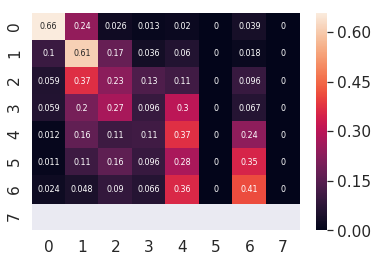

In [201]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

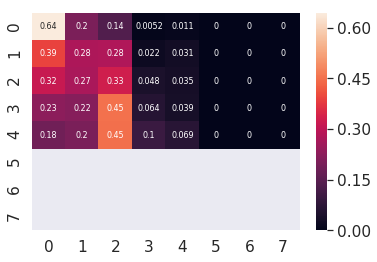

In [955]:
df_cm = pd.DataFrame(heatmap, range(8),
                  range(8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 8})

In [217]:
x_test_view = np.concatenate((x_test, y_pred_class), axis=1)

In [218]:
y_pred_view = model_view.predict(x_test_view)

In [219]:
y_pred_view.shape

(1072, 1)

In [220]:
y_test_view.shape

(1072, 1)

In [221]:
mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 1326174.3778776233
rmse : 1151.5964474926202
mae : 641.6958638682537


In [158]:
mse = mean_squared_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.exp(y_pred_view*MAXVIEW_log), np.exp(y_test_view*MAXVIEW_log))
print('mse :',mse)
print('rmse :',rmse)
print('mae :',mae)

mse : 1375047.6029306003
rmse : 1172.6242377379892
mae : 636.4155404759804


In [159]:
x_train_class.shape

(3429, 790)

In [222]:
y_train_view.shape

(3429, 1)

In [223]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_train_class),y_train_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [224]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

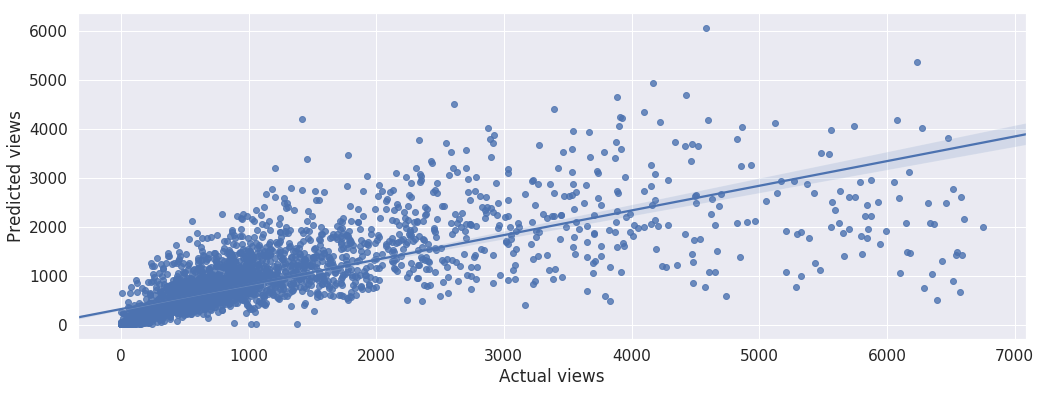

In [225]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


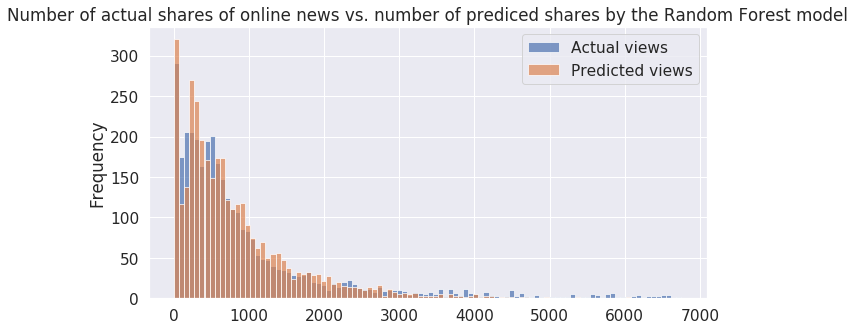

In [226]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [227]:
x_test_view.shape

(1072, 790)

In [228]:
y_test_view.shape

(1072, 1)

In [229]:
# some_X_data = x_train[:500]
# some_y_data = y_train[:500]
#print("Predicted shares:", lin_reg.predict(some_X_data))
#print("Actual shares:", list(some_y_data))

#We test how the model works by creating a dataframe from the sample. The df is then used as source for the seaborn plot below
df_someXdata = pd.DataFrame(model_view.predict(x_test_view),y_test_view )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual views", 0: "Predicted views"})
# df_someXdata_LR[:50]

In [230]:
df_someXdata_LR["Actual views"] = np.exp(df_someXdata_LR["Actual views"]*MAXVIEW_log)
df_someXdata_LR["Predicted views"] = np.exp(df_someXdata_LR["Predicted views"]*MAXVIEW_log)

AttributeError: module 'seaborn' has no attribute 'plt'

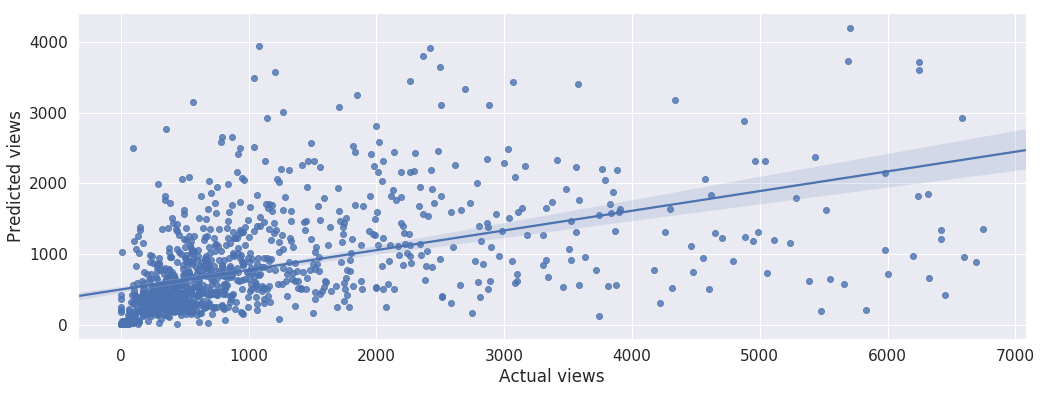

In [231]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual views"], y=df_someXdata_LR["Predicted views"])
sns.plt.show()

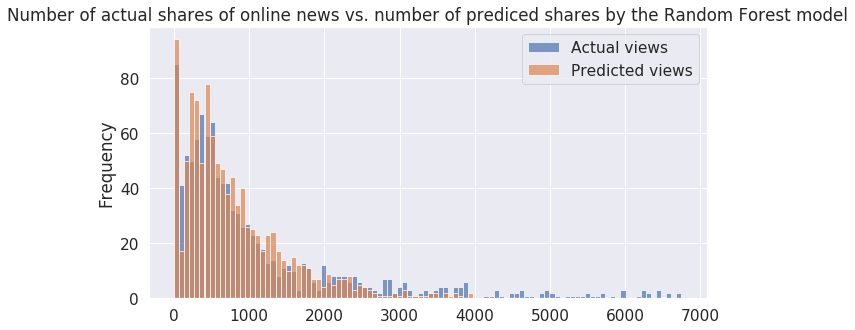

In [232]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()

In [233]:
df_someXdata_LR.to_csv('output-nation.csv')

In [234]:
input_nation_test.to_csv('headline-test-nation.csv')

## compared to baseline model

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [175]:
view_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse #with outliers: 11648.966

247916930052856.75

In [176]:
lin_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(lin_mae)

16409839550463.88


In [177]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [178]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [179]:
view_predictions = tree_reg.predict(x_test)
tree_mse = mean_squared_error( np.exp(y_test_view*MAXVIEW_log), view_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1388.0556658753862

In [180]:
tree_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), view_predictions)
print(tree_mae)

790.7402037431888


In [181]:
forest_reg = RandomForestRegressor(random_state=1)
forest_reg.fit(x_train, np.exp(y_train_view*MAXVIEW_log))

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [182]:
share_predictions = forest_reg.predict(x_test)
forest_mse = mean_squared_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse #with outliers:5282.35

1197.989760643119

In [183]:
forest_mae = mean_absolute_error(np.exp(y_test_view*MAXVIEW_log), share_predictions)
print(forest_mae) #with outliers:1424

675.2876172187575


In [184]:
df_someXdata = pd.DataFrame(forest_reg.predict(x_test),np.exp(y_test_view*MAXVIEW_log) )
df_someXdata.reset_index(level=0, inplace=True)
df_someXdata_LR = df_someXdata.rename(index=str, columns={"index": "Actual view", 0: "Predicted view"})
df_someXdata_LR.head()

,Actual view,Predicted view
0,1067.00001,270.00001
1,424.00001,623.50001
2,927.00001,992.40001
3,523.00001,428.90001
4,656.00001,2473.00001


AttributeError: module 'seaborn' has no attribute 'plt'

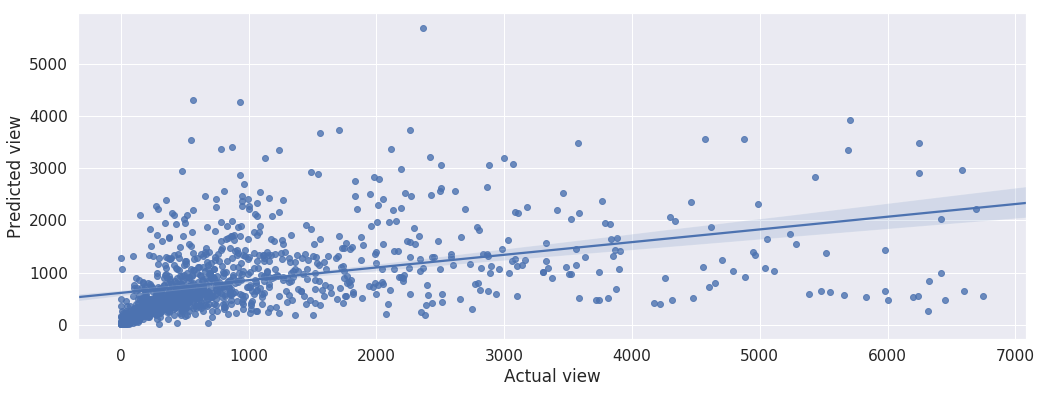

In [185]:
f, ax = plt.subplots(figsize=(17, 6))
sns.regplot(x=df_someXdata_LR["Actual view"], y=df_someXdata_LR["Predicted view"])
sns.plt.show()

/home/arintrongs2/.pyenv/versions/3.6.0/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


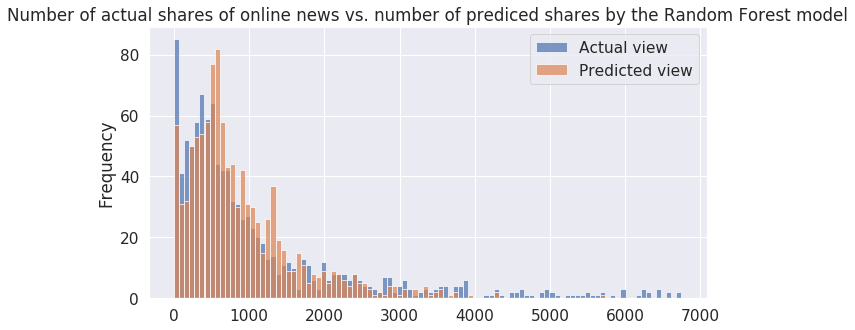

In [186]:
df_someXdata_LR.plot(bins=100, kind='hist', alpha=0.7,figsize=(10,5))
plt.title('Number of actual shares of online news vs. number of prediced shares by the Random Forest model')
axes=plt.axes()
plt.show()